In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

X = load_iris().data[:,:2]
y = load_iris().target

features = load_iris().feature_names[:2]

print(X.shape)
print(y.shape)
print(features)

(150, 2)
(150,)
['sepal length (cm)', 'sepal width (cm)']


## Splitting into train and test sets

In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state= 28)

print(X_train.shape)
print(X_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(105, 2)
(45, 2)

(105,)
(45,)


## Training a Decision tree Model

In [4]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

clf = DecisionTreeClassifier(max_depth=3,random_state=28)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=28)

In [5]:
# Model validation
from sklearn.metrics import accuracy_score,classification_report

y_pred = clf.predict(X_test)
print('accuracy: ',accuracy_score(y_test,y_pred))
print()
print('classification Report\n ',classification_report(y_test,y_pred))

accuracy:  0.7333333333333333

classification Report
                precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.71      0.63      0.67        19
           2       0.59      0.71      0.65        14

    accuracy                           0.73        45
   macro avg       0.76      0.75      0.76        45
weighted avg       0.75      0.73      0.74        45



## Plotting decision tree using sklearn

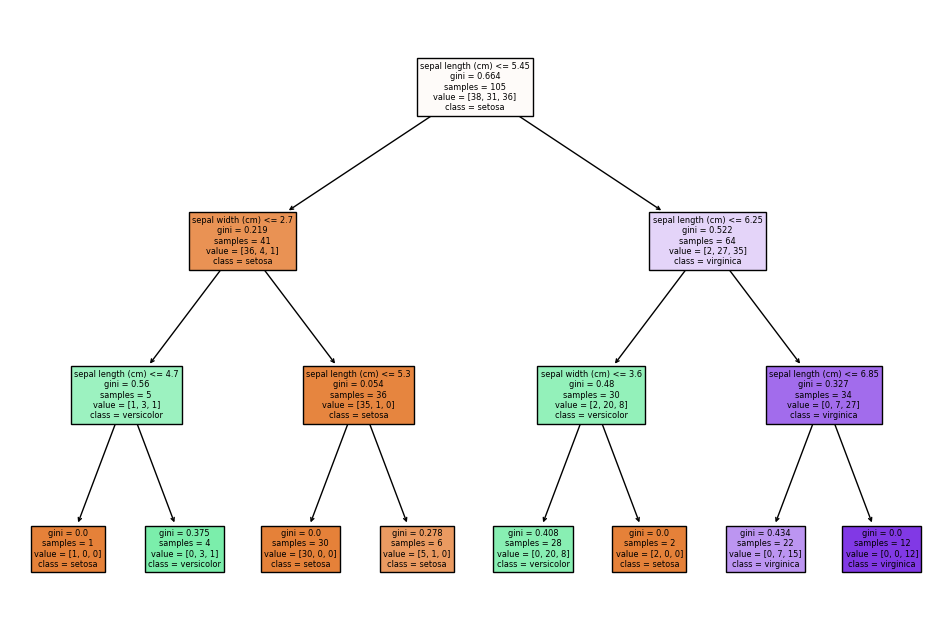

In [6]:
plt.figure(figsize=(12,8))
plot_tree(clf,feature_names=features,class_names = list(load_iris().target_names),filled=True)
plt.show()

## Plotting decision boundary

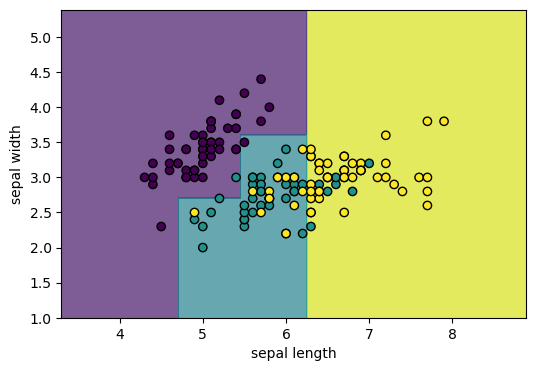

In [7]:
plt.figure(figsize = (6,4))

x_min,x_max = X[:,0].min() - 1 , X[:,0].max() + 1
y_min,y_max = X[:,1].min() - 1 , X[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.01), np.arange(y_min,y_max,0.01))

z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z,alpha = 0.7)
plt.scatter(X[:,0], X[:,1],c = y,edgecolor = 'k')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [8]:
from sklearn.tree import export_text

In [9]:
print(export_text(clf,feature_names=['sepal_length','sepal_width']))

|--- sepal_length <= 5.45
|   |--- sepal_width <= 2.70
|   |   |--- sepal_length <= 4.70
|   |   |   |--- class: 0
|   |   |--- sepal_length >  4.70
|   |   |   |--- class: 1
|   |--- sepal_width >  2.70
|   |   |--- sepal_length <= 5.30
|   |   |   |--- class: 0
|   |   |--- sepal_length >  5.30
|   |   |   |--- class: 0
|--- sepal_length >  5.45
|   |--- sepal_length <= 6.25
|   |   |--- sepal_width <= 3.60
|   |   |   |--- class: 1
|   |   |--- sepal_width >  3.60
|   |   |   |--- class: 0
|   |--- sepal_length >  6.25
|   |   |--- sepal_length <= 6.85
|   |   |   |--- class: 2
|   |   |--- sepal_length >  6.85
|   |   |   |--- class: 2



# Effect of Pruning

In [11]:
print(X_train.shape)
print(X_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(105, 2)
(45, 2)

(105,)
(45,)


## max_depth

Train accuracy: 0.9619047619047619, Test accuracy: 0.6444444444444445

Train classification Report
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.89      1.00      0.94        31
           2       1.00      0.89      0.94        36

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.97      0.96      0.96       105


Test classification Report
                precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.60      0.47      0.53        19
           2       0.47      0.64      0.55        14

    accuracy                           0.64        45
   macro avg       0.69      0.68      0.68        45
weighted avg       0.67      0.64      0.65        45



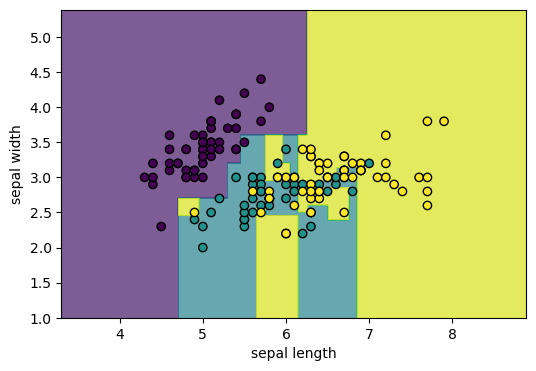

In [16]:
# Fitting the model with No max depth
clf = DecisionTreeClassifier(max_depth=None,random_state=28)
clf.fit(X_train,y_train)

# Validating the model
y_pred = clf.predict(X_test)

# training performance
print('Train accuracy: {}, Test accuracy: {}'.format(accuracy_score(y_train,clf.predict(X_train)),accuracy_score(y_test,y_pred)))
print()
print('Train classification Report\n ',classification_report(y_train,clf.predict(X_train)))

print()
print('Test classification Report\n ',classification_report(y_test,y_pred))

# Visualizing the decision boundary
plt.figure(figsize = (6,4))

x_min,x_max = X[:,0].min() - 1 , X[:,0].max() + 1
y_min,y_max = X[:,1].min() - 1 , X[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.01), np.arange(y_min,y_max,0.01))

z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z,alpha = 0.7)
plt.scatter(X[:,0], X[:,1],c = y,edgecolor = 'k')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

### For fully grown tree We can clearly see that the model fits training data extremely well, but does poorly on test data

Train accuracy: 0.8380952380952381, Test accuracy: 0.7333333333333333

Train classification Report
                precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       0.72      0.74      0.73        31
           2       0.79      0.75      0.77        36

    accuracy                           0.84       105
   macro avg       0.83      0.83      0.83       105
weighted avg       0.84      0.84      0.84       105


Test classification Report
                precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.71      0.63      0.67        19
           2       0.59      0.71      0.65        14

    accuracy                           0.73        45
   macro avg       0.76      0.75      0.76        45
weighted avg       0.75      0.73      0.74        45



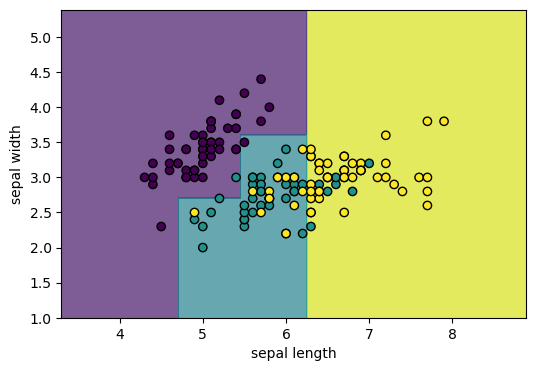

In [20]:
# Fitting the model with  max depth = 3
clf = DecisionTreeClassifier(max_depth=3,random_state=28)
clf.fit(X_train,y_train)

# Validating the model
y_pred = clf.predict(X_test)

# training performance
print('Train accuracy: {}, Test accuracy: {}'.format(accuracy_score(y_train,clf.predict(X_train)),accuracy_score(y_test,y_pred)))
print()
print('Train classification Report\n ',classification_report(y_train,clf.predict(X_train)))

print()
print('Test classification Report\n ',classification_report(y_test,y_pred))

# Visualizing the decision boundary
plt.figure(figsize = (6,4))

x_min,x_max = X[:,0].min() - 1 , X[:,0].max() + 1
y_min,y_max = X[:,1].min() - 1 , X[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.01), np.arange(y_min,y_max,0.01))

z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z,alpha = 0.7)
plt.scatter(X[:,0], X[:,1],c = y,edgecolor = 'k')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

### Here with max depth = 3, The training and test performance are closer, ie less overfitting

## minimum samples split

Train accuracy: 0.9619047619047619, Test accuracy: 0.6444444444444445

Train classification Report
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.89      1.00      0.94        31
           2       1.00      0.89      0.94        36

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.97      0.96      0.96       105


Test classification Report
                precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.60      0.47      0.53        19
           2       0.47      0.64      0.55        14

    accuracy                           0.64        45
   macro avg       0.69      0.68      0.68        45
weighted avg       0.67      0.64      0.65        45



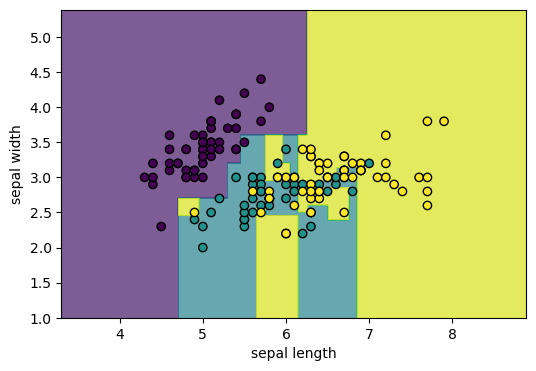

In [21]:
# Fitting the model with No stopping on minimum samples split
clf = DecisionTreeClassifier(random_state=28)
clf.fit(X_train,y_train)

# Validating the model
y_pred = clf.predict(X_test)

# training performance
print('Train accuracy: {}, Test accuracy: {}'.format(accuracy_score(y_train,clf.predict(X_train)),accuracy_score(y_test,y_pred)))
print()
print('Train classification Report\n ',classification_report(y_train,clf.predict(X_train)))

print()
print('Test classification Report\n ',classification_report(y_test,y_pred))

# Visualizing the decision boundary
plt.figure(figsize = (6,4))

x_min,x_max = X[:,0].min() - 1 , X[:,0].max() + 1
y_min,y_max = X[:,1].min() - 1 , X[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.01), np.arange(y_min,y_max,0.01))

z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z,alpha = 0.7)
plt.scatter(X[:,0], X[:,1],c = y,edgecolor = 'k')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

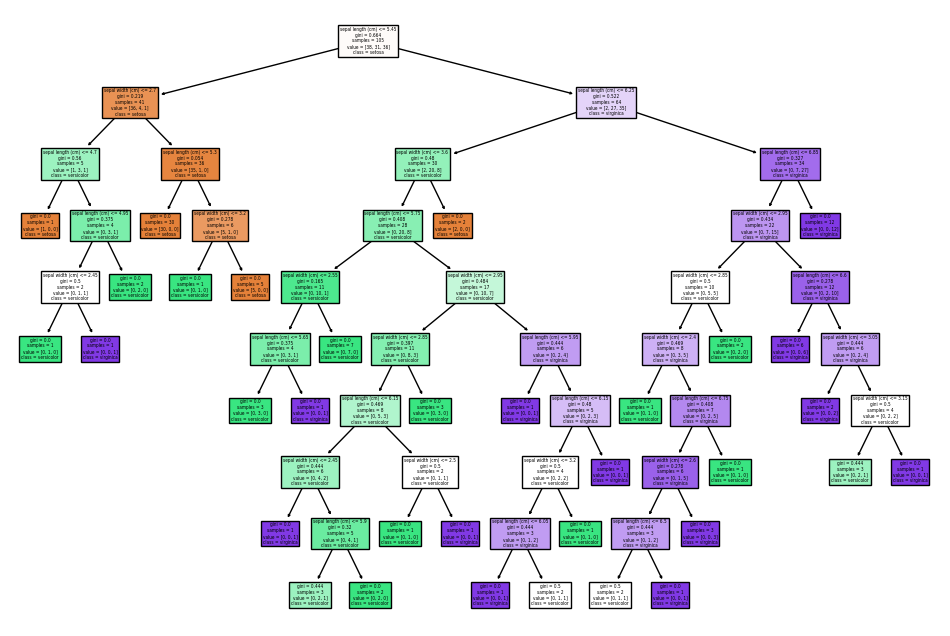

In [22]:
plt.figure(figsize=(12,8))
plot_tree(clf,feature_names=features,class_names = list(load_iris().target_names),filled=True)
plt.show()

Train accuracy: 0.8285714285714286, Test accuracy: 0.6888888888888889

Train classification Report
                precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.65      0.90      0.76        31
           2       0.92      0.61      0.73        36

    accuracy                           0.83       105
   macro avg       0.85      0.83      0.82       105
weighted avg       0.86      0.83      0.83       105


Test classification Report
                precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.62      0.68      0.65        19
           2       0.54      0.50      0.52        14

    accuracy                           0.69        45
   macro avg       0.72      0.70      0.71        45
weighted avg       0.70      0.69      0.69        45



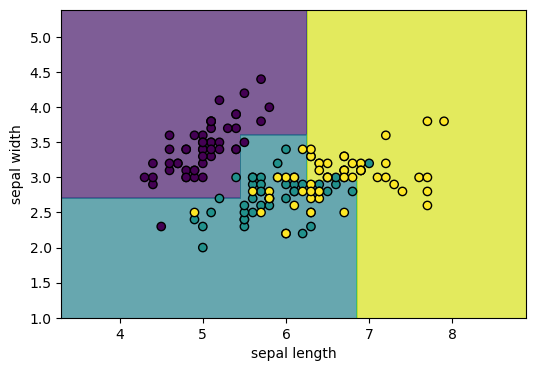

In [37]:
# Fitting the model with minimum samples = 20
clf = DecisionTreeClassifier(min_samples_split=20,random_state=28)
clf.fit(X_train,y_train)

# Validating the model
y_pred = clf.predict(X_test)

# training performance
print('Train accuracy: {}, Test accuracy: {}'.format(accuracy_score(y_train,clf.predict(X_train)),accuracy_score(y_test,y_pred)))
print()
print('Train classification Report\n ',classification_report(y_train,clf.predict(X_train)))

print()
print('Test classification Report\n ',classification_report(y_test,y_pred))

# Visualizing the decision boundary
plt.figure(figsize = (6,4))

x_min,x_max = X[:,0].min() - 1 , X[:,0].max() + 1
y_min,y_max = X[:,1].min() - 1 , X[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.01), np.arange(y_min,y_max,0.01))

z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z,alpha = 0.7)
plt.scatter(X[:,0], X[:,1],c = y,edgecolor = 'k')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

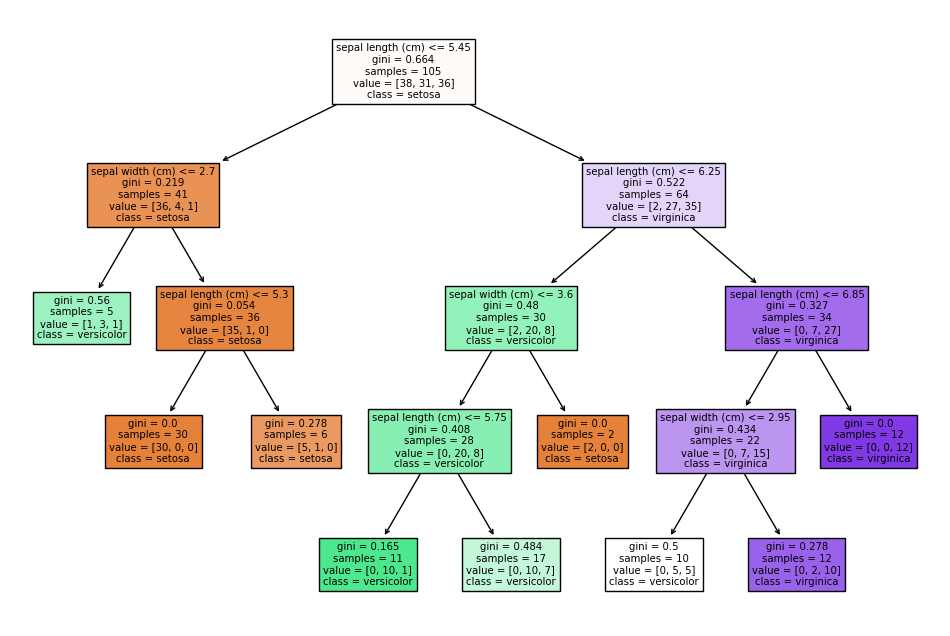

In [38]:
plt.figure(figsize=(12,8))
plot_tree(clf,feature_names=features,class_names = list(load_iris().target_names),filled=True)
plt.show()